In [1]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

# %matplotlib inline
# %precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set seed for reproducibility
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import ma2
from elfi.methods.parameter_inference import ROMC
model = ma2.get_model(seed_obs=seed)

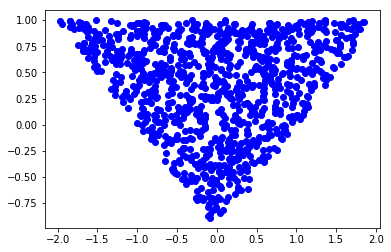

In [2]:
x = model.generate(1000)

plt.plot(x["t1"], x["t2"], "bo")
plt.show()

In [3]:
bounds = [(-2,2), (-2,2)]
romc = ROMC(model, bounds=bounds, discrepancy_name="d")

In [31]:
n1 = 1000
seed = 21
romc.solve_problems(n1=n1, seed=seed)

### Solving problems using a gradient-based method ###
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 30.751 sec
Time: 30.751 sec


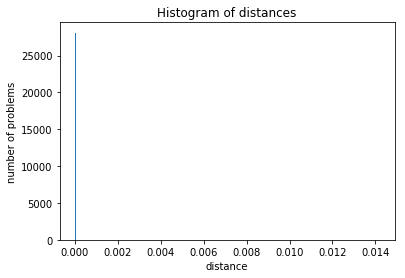

In [74]:
romc.distance_hist(bins=400)

In [59]:
eps = .01
romc.estimate_regions(eps=eps)

Total solutions: 1000, Accepted solutions after filtering: 999
### Estimating regions ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 11.768 sec 



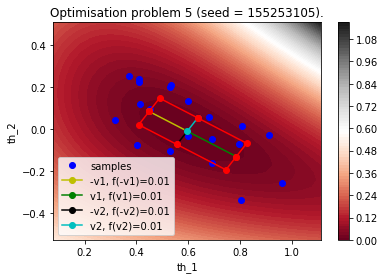

In [60]:
romc.visualize_region(5)

In [61]:
romc.eval_unnorm_posterior(np.array([[0.6, 0.2]]))

array([29.75])

In [62]:
# def plot_romc_posterior(posterior, nof_points):
#     plt.figure()
#     th1 = np.linspace(bounds[0][0], bounds[0][1], nof_points)
#     th2 = np.linspace(bounds[1][0], bounds[1][1], nof_points)
#     X, Y = np.meshgrid(th1, th2)

#     x_flat = X.flatten()
#     y_flat = Y.flatten()
#     th = np.stack((x_flat, y_flat), -1)
#     z_flat = posterior(th)
#     Z = z_flat.reshape(nof_points, nof_points)
    
#     plt.contourf(X, Y, Z, 50, cmap='viridis')
#     plt.title('ROMC Unnorm Posterior PDF')
#     plt.xlabel("th_1")
#     plt.ylabel("th_2")
#     plt.colorbar()
#     plt.show(block=False)
    
# plot_romc_posterior(romc.eval_unnorm_posterior, nof_points=20)

In [63]:
n2 = 20
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time: 58.360 sec 



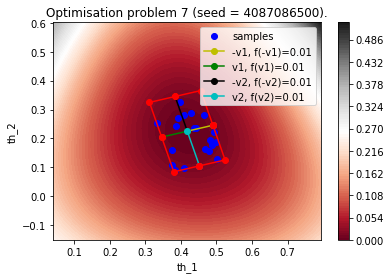

In [64]:
# As before but now it plots the samples as well
romc.visualize_region(7)

# ROMC - check the obtained samples

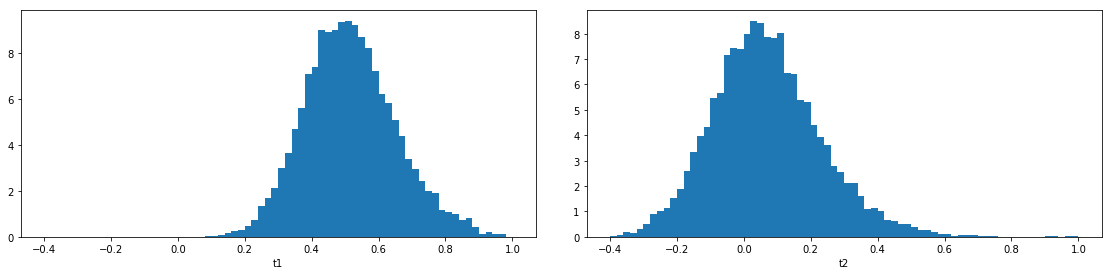

In [65]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70, range=(-.4, 1))
plt.show()

In [66]:
romc.result.summary()

Method: ROMC
Number of samples: 20000
Sample means: t1: 0.516, t2: 0.0687


In [67]:
x = romc.result.samples_array
weights = romc.result.weights
np.cov(x, rowvar=False, aweights=weights)

array([[0.01858713, 0.00282421],
       [0.00282421, 0.02702488]])

# Rejection ABC - check obtained samples

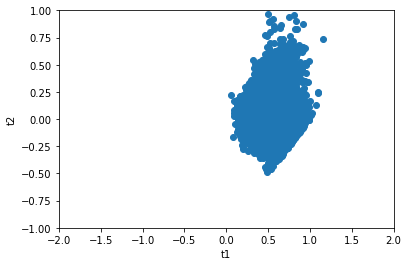

Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 1min 6s, sys: 26.4 s, total: 1min 32s
Wall time: 31.8 s
Method: Rejection
Number of samples: 10000
Number of simulations: 1190000
Threshold: 0.1
Sample means: t1: 0.514, t2: 0.0706


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6cf24c50>,
      dtype=object)

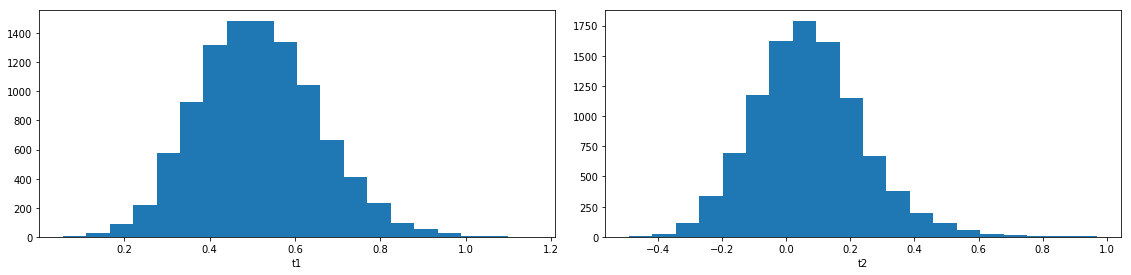

In [48]:
N=10000
rej = elfi.Rejection(model, discrepancy_name="d", batch_size=10000, seed=seed)
vis = dict(xlim=[-2,2], ylim=[-1,1])
%time result = rej.sample(N, threshold=.1, vis=vis)
result.summary()
result.plot_marginals()

In [49]:
x = result.samples_array
weights = None
np.cov(x, rowvar=False)

array([[0.01998835, 0.0030093 ],
       [0.0030093 , 0.0299338 ]])